In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
data_train=pd.read_csv('/Users/zenghao/Downloads/train.csv',index_col=0)
data_predict=pd.read_csv('/Users/zenghao/Downloads/test.csv',index_col=0)

In [9]:
data_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [11]:
print(data_train.shape,data_predict.shape)

(1460, 80) (1459, 79)


In [13]:
data_preprocess=pd.concat([data_train,data_predict])
print(data_preprocess.shape)

(2919, 80)


In [15]:
data_preprocess.dtypes[data_preprocess.dtypes!='object']

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars       float64
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MSSubClass         int64
MasVnrArea       float64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
SalePrice        float64
ScreenPorch        int64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
dtype: object

In [16]:
data_preprocess.loc[:,['MSSubClass','MoSold','OverallQual','OverallCond']]=data_preprocess.loc[:,['MSSubClass','MoSold','OverallQual','OverallCond']].astype('object')

In [19]:
data_preprocess.dtypes[data_preprocess.dtypes!='object']

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars       float64
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MasVnrArea       float64
MiscVal            int64
OpenPorchSF        int64
PoolArea           int64
SalePrice        float64
ScreenPorch        int64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
dtype: object

In [20]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

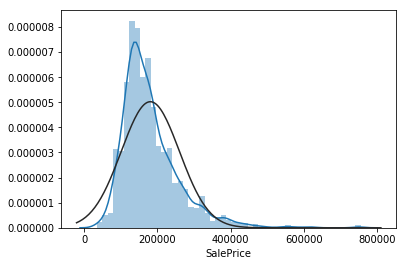

In [22]:
from scipy.stats import norm
%matplotlib inline
sns.distplot(data_train['SalePrice'],fit=norm)

In [23]:
print(data_train['SalePrice'].skew())

1.8828757597682129


In [26]:
print(data_train['SalePrice'].kurt())

6.536281860064529


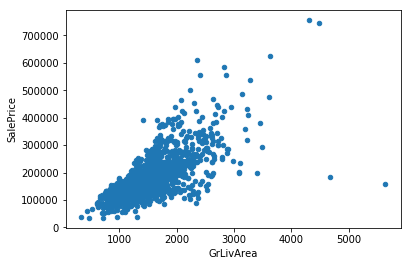

In [29]:
data_train.plot.scatter(x='GrLivArea',y='SalePrice')

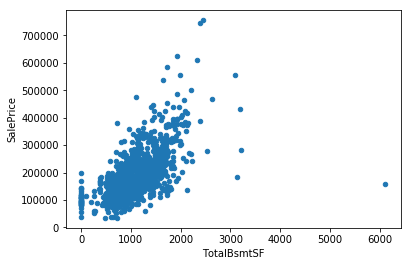

In [30]:
data_train.plot.scatter(x='TotalBsmtSF',y='SalePrice')

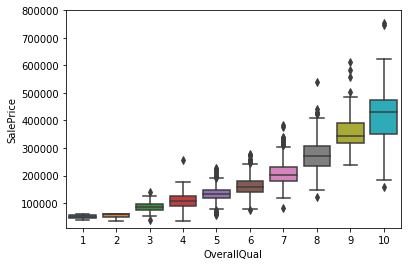

In [35]:
f1=plt.figure()
ax=f1.add_subplot(111)
ax.set_ylim(10000,800000)
sns.boxplot(x='OverallQual',y='SalePrice',data=data_train,ax=ax)